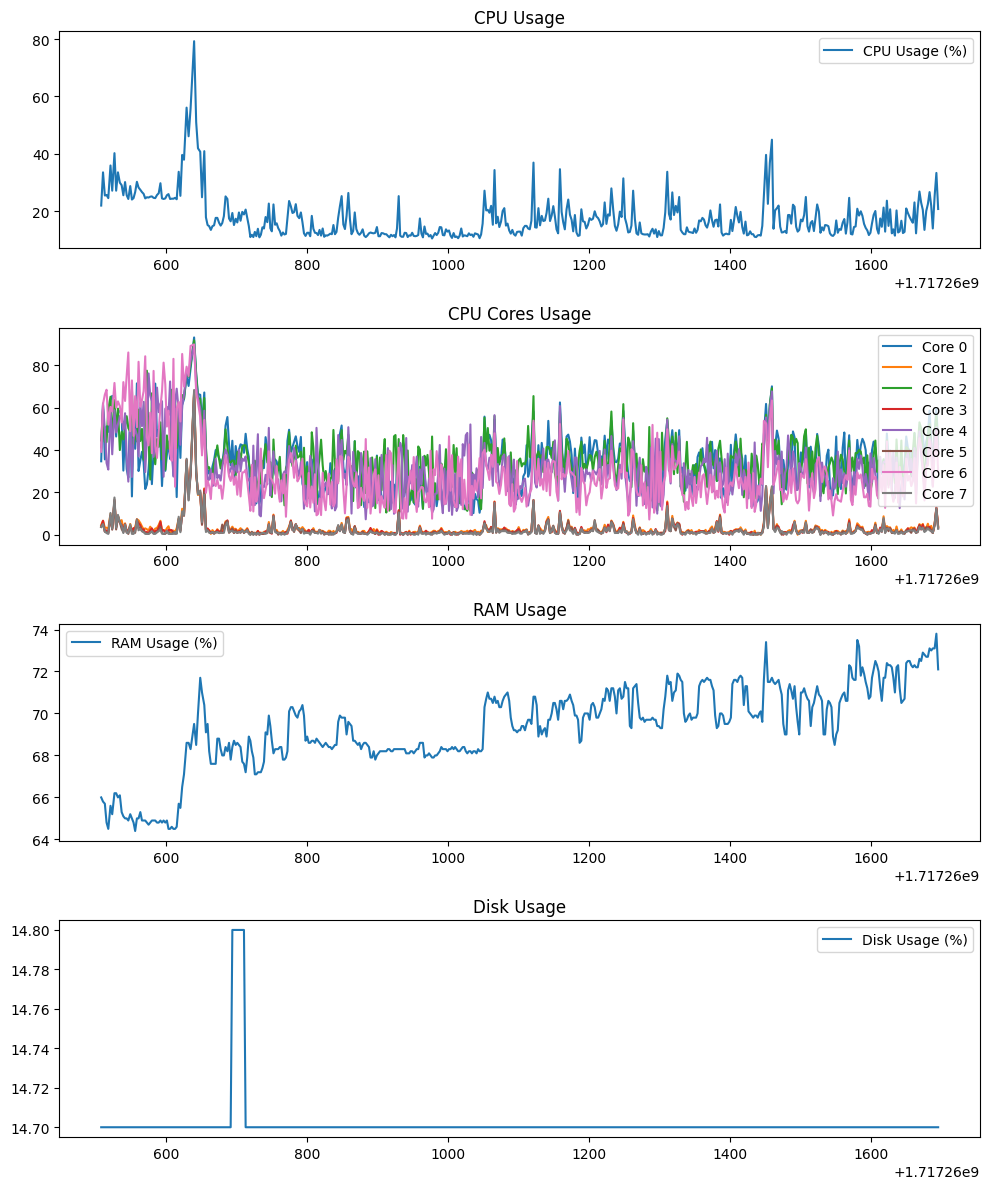

Monitoring interrupted by user.


In [37]:
import psutil
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import os

# Initialize lists to store the data
data = {
    'timestamp': [],
    'cpu_usage': [],
    'cores_usage': [],
    'ram_usage': [],
    'disk_usage': []
}
stop_flag_path = "stop_monitoring.flag"
output_csv_path = "monitoring_data.csv"

# Define a function to get system stats
def get_system_stats():
    data['timestamp'].append(time.time())
    data['cpu_usage'].append(psutil.cpu_percent())
    data['cores_usage'].append(psutil.cpu_percent(percpu=True))
    data['ram_usage'].append(psutil.virtual_memory().percent)
    data['disk_usage'].append(psutil.disk_usage('/').percent)

# Define a function to plot the collected data
def plot_stats():
    clear_output(wait=True)
    fig, axs = plt.subplots(4, 1, figsize=(10, 12))

    # CPU usage plot
    axs[0].plot(data['timestamp'], data['cpu_usage'], label='CPU Usage (%)')
    axs[0].set_title('CPU Usage')
    axs[0].legend()

    # Cores usage plot
    for i in range(len(data['cores_usage'][0])):
        core_usage = [core[i] for core in data['cores_usage']]
        axs[1].plot(data['timestamp'], core_usage, label=f'Core {i}')
    axs[1].set_title('CPU Cores Usage')
    axs[1].legend()

    # RAM usage plot
    axs[2].plot(data['timestamp'], data['ram_usage'], label='RAM Usage (%)')
    axs[2].set_title('RAM Usage')
    axs[2].legend()

    # Disk usage plot
    axs[3].plot(data['timestamp'], data['disk_usage'], label='Disk Usage (%)')
    axs[3].set_title('Disk Usage')
    axs[3].legend()

    plt.tight_layout()
    plt.show()

# Monitor the system every second with stop flag checking
try:
    while True:
        if os.path.exists(stop_flag_path):
            print("Stop flag detected. Stopping monitoring.")
            break
        get_system_stats()
        plot_stats()
        time.sleep(1)
except KeyboardInterrupt:
    print("Monitoring interrupted by user.")
finally:
    # Save the collected data to a CSV file
    df = pd.DataFrame(data)
#     df.to_csv(output_csv_path, index=False)
#     print(f"Monitoring data saved to {output_csv_path}")

    # Cleanup: Remove the stop flag file if it exists
    if os.path.exists(stop_flag_path):
        os.remove(stop_flag_path)


In [7]:
df

,timestamp,cpu_usage,cores_usage,ram_usage,disk_usage
0,1.717186e+09,7.6,"[20.9, 0.8, 17.1, 0.7, 11.8, 0.6, 8.7, 0.5]",61.6,14.3
1,1.717186e+09,12.3,"[35.8, 0.9, 31.8, 0.4, 13.8, 1.3, 13.9, 0.9]",62.2,14.3
2,1.717186e+09,14.9,"[37.2, 1.7, 29.4, 1.3, 26.8, 0.8, 20.8, 0.8]",62.3,14.3
3,1.717186e+09,19.1,"[39.8, 3.3, 37.3, 2.1, 35.7, 1.7, 30.7, 2.5]",62.3,14.3
4,1.717186e+09,21.3,"[41.4, 1.8, 36.8, 1.4, 50.2, 0.9, 36.8, 1.3]",62.2,14.3
5,1.717186e+09,23.1,"[41.6, 1.4, 31.8, 1.4, 42.3, 0.9, 65.0, 0.5]",62.0,14.3
6,1.717186e+09,13.2,"[29.6, 0.9, 19.9, 1.3, 34.5, 0.0, 19.0, 0.4]",62.0,14.3
7,1.717186e+09,15.1,"[33.6, 1.7, 39.6, 0.4, 24.3, 0.9, 20.1, 0.4]",62.0,14.3
8,1.717186e+09,17.3,"[41.7, 0.9, 36.2, 1.3, 28.2, 1.7, 26.8, 1.3]",62.2,14.3
9,1.717186e+09,27.6,"[53.8, 3.4, 43.0, 3.4, 52.3, 2.6, 59.6, 2.6]",62.0,14.3


In [13]:
time.time()

1716581516.5207691

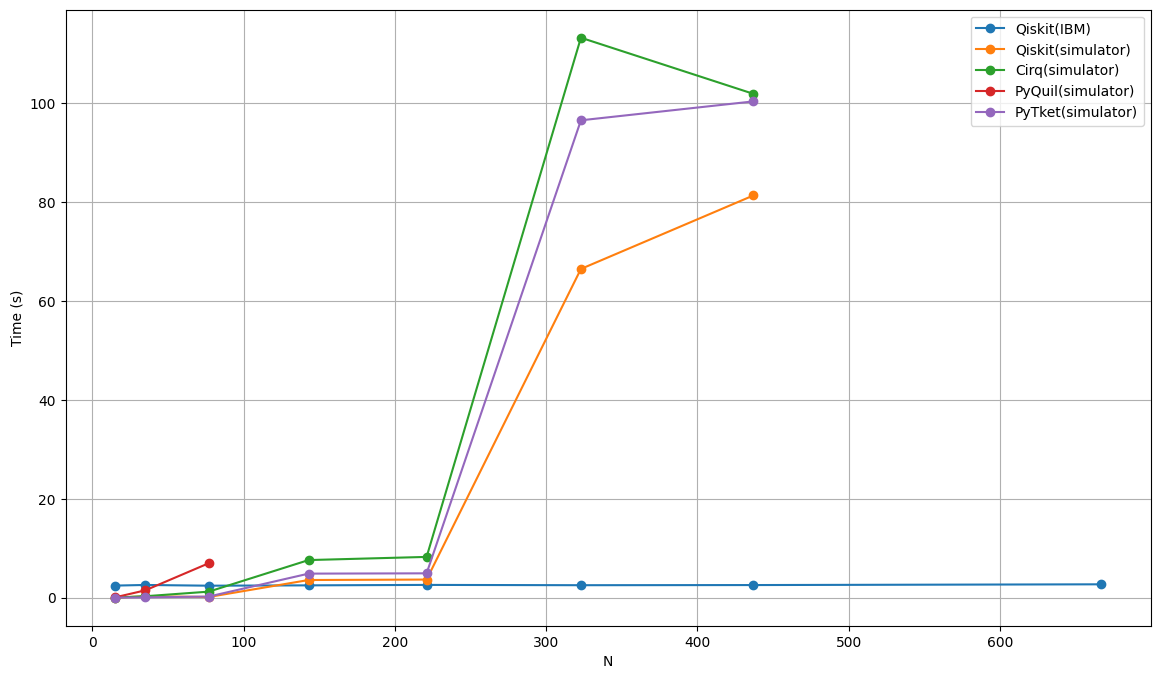

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
data = {
    "N": [15, 35, 77, 143, 221, 323, 437, 667],
    "Qiskit(IBM)": [2.45, 2.58, 2.43, 2.5, 2.59, 2.53, 2.56, 2.71],
    "Qiskit(simulator)": [0, 0.3, 0.15, 3.58, 3.67, 66.45, 81.3, None],
    "Cirq(simulator)": [0.03, 0.3, 1.23, 7.61, 8.25, 113.18, 101.84, None],
    "PyQuil(simulator)": [0.07, 1.49, 6.97, None, None, None, None, None],
    "PyTket(simulator)": [0.02, 0.07, 0.24, 4.87, 4.93, 96.49, 100.31, None],
    "Special Value": [4.39799E+12, 10_000, 51.51, None, None, None, None, None]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(14, 8))

# Plot each column
for column in df.columns[1:-1]:  # Exclude 'N', 'Shots', and 'Special Value'
    plt.plot(df["N"], df[column], marker='o', label=column)

# Add labels and title
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
